In [ ]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=61f85bfad112e2585210ecd9bb4ede7c8e61f7d545bd763a49fe46f756dce184
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [ ]:
!pip install requests

In [ ]:
!pip freeze > requirements.txt

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Your CryptoCompare API key
API_KEY = '57819025e42cfd2d2d1a716f2e3feb8b0b251ee88ee386cc71f74efaba89e9ed'

def fetch_crypto_ohlc(crypto_symbol, currency, timeframe='day', limit=200):
    """
    Fetch historical OHLC data for a cryptocurrency.

    Parameters:
    - crypto_symbol (str): Symbol of the cryptocurrency (e.g., 'BTC')
    - currency (str): The currency to get OHLC data in (e.g., 'USD', 'INR')
    - timeframe (str): The timeframe for the data. Options are 'day', 'hour', 'minute'.
    - limit (int): Number of data points to fetch (maximum 2000 for most endpoints).

    Returns:
    - DataFrame containing historical OHLC data.
    """

    # Define the URL based on the timeframe
    if timeframe == 'day':
        url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    elif timeframe == 'hour':
        url = f'https://min-api.cryptocompare.com/data/v2/histohour'
    elif timeframe == 'minute':
        url = f'https://min-api.cryptocompare.com/data/v2/histominute'
    else:
        raise ValueError("Invalid timeframe. Use 'day', 'hour', or 'minute'.")

    # Set the parameters for the request
    params = {
        'fsym': crypto_symbol,  # from symbol (e.g., BTC)
        'tsym': currency,       # to symbol (e.g., USD)
        'limit': limit,         # number of data points
        'api_key': API_KEY      # your API key
    }

    # Send the request
    response = requests.get(url, params=params)
    data = response.json()

    # Check if response contains data
    if data['Response'] != 'Success':
        raise ValueError(f"Error fetching data: {data.get('Message', 'No data available')}")

    # Convert the data to a DataFrame
    ohlc_data = data['Data']['Data']
    df = pd.DataFrame(ohlc_data)

    # Convert the timestamp to a datetime format
    df['time'] = pd.to_datetime(df['time'], unit='s')

    # Select only relevant columns
    df = df[['time', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto']]
    df.rename(columns={'volumefrom': 'volume', 'volumeto': 'volume_in_currency'}, inplace=True)

    return df

# Example usage
crypto_symbol = 'BTC'  # Cryptocurrency symbol (e.g., 'BTC')
currency = 'USD'       # Currency symbol (e.g., 'USD' or 'INR')
timeframe = 'day'      # Timeframe ('day', 'hour', or 'minute')
limit = 100            # Number of data points

# Fetch the data
df = fetch_crypto_ohlc(crypto_symbol, currency, timeframe, limit)
print(df.head())


        time      open      high       low     close    volume  \
0 2024-07-22  68176.98  68490.59  66594.51  67567.71  26712.99   
1 2024-07-23  67567.71  67774.86  65465.88  65939.83  29465.67   
2 2024-07-24  65939.83  67120.99  65112.45  65375.53  21576.01   
3 2024-07-25  65375.53  66154.31  63429.11  65794.00  29473.48   
4 2024-07-26  65794.00  68219.43  65734.24  67925.17  24567.97   

   volume_in_currency  
0        1.805561e+09  
1        1.958486e+09  
2        1.426728e+09  
3        1.902597e+09  
4        1.654021e+09  


THE REAL FUNCTION---- STEP 1 Python Function for Data Retrieval


In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Your CryptoCompare API key
API_KEY = '57819025e42cfd2d2d1a716f2e3feb8b0b251ee88ee386cc71f74efaba89e9ed'

def fetch_crypto_ohlc_range(crypto_symbol, currency, timeframe='day', start_date=None, end_date=None):
    """
    Fetch historical OHLC data for a cryptocurrency within a specified date range.

    Parameters:
    - crypto_symbol (str): Symbol of the cryptocurrency (e.g., 'BTC')
    - currency (str): The currency to get OHLC data in (e.g., 'USD', 'INR')
    - timeframe (str): The timeframe for the data. Options are 'day', 'hour', 'minute'.
    - start_date (str): The start date in 'YYYY-MM-DD' format.
    - end_date (str): The end date in 'YYYY-MM-DD' format.

    Returns:
    - DataFrame containing historical OHLC data within the specified range.
    """

    # Define the URL based on the timeframe
    if timeframe == 'day':
        url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    elif timeframe == 'hour':
        url = 'https://min-api.cryptocompare.com/data/v2/histohour'
    elif timeframe == 'minute':
        url = 'https://min-api.cryptocompare.com/data/v2/histominute'
    else:
        raise ValueError("Invalid timeframe. Use 'day', 'hour', or 'minute'.")

    # Convert start and end dates to timestamps
    start_timestamp = int(datetime.strptime(start_date, '%Y-%m-%d').timestamp()) if start_date else None
    end_timestamp = int(datetime.strptime(end_date, '%Y-%m-%d').timestamp()) if end_date else int(datetime.now().timestamp())

    all_data = []  # To store all data points

    # Loop to collect data until reaching the start date
    while True:
        # Set the parameters for the request
        params = {
            'fsym': crypto_symbol,      # from symbol (e.g., BTC)
            'tsym': currency,           # to symbol (e.g., USD)
            'limit': 2000,              # max number of data points per request
            'api_key': API_KEY,         # your API key
            'toTs': end_timestamp       # end timestamp for this batch
        }

        # Send the request
        response = requests.get(url, params=params)
        data = response.json()

        # Check if response contains data
        if data['Response'] != 'Success':
            raise ValueError(f"Error fetching data: {data.get('Message', 'No data available')}")

        # Convert the data to a DataFrame
        ohlc_data = data['Data']['Data']
        df = pd.DataFrame(ohlc_data)

        # Convert the timestamp to a datetime format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Filter out data outside of the start date
        if start_timestamp:
            df = df[df['time'].apply(lambda x: x.timestamp()) >= start_timestamp]

        # Break if no more data or all data is within range
        if df.empty or (start_timestamp and df['time'].iloc[0].timestamp() <= start_timestamp):
            all_data.append(df)
            break

        # Append data and update the end timestamp for the next batch
        all_data.append(df)
        end_timestamp = int(df['time'].iloc[0].timestamp()) - 1  # Continue from before the earliest timestamp

    # Concatenate all data into a single DataFrame
    final_df = pd.concat(all_data).reset_index(drop=True)

    # Select only relevant columns and rename
    final_df = final_df[['time', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto']]
    final_df.rename(columns={'volumefrom': 'volume', 'volumeto': 'volume_in_currency'}, inplace=True)

    return final_df

# # Example usage
# crypto_symbol = 'BTC'       # Cryptocurrency symbol (e.g., 'BTC')
# currency = 'USD'            # Currency symbol (e.g., 'USD' or 'INR')
# timeframe = 'day'           # Timeframe ('day', 'hour', or 'minute')
# start_date = '2023-01-01'   # Start date in 'YYYY-MM-DD' format
# end_date = '2023-12-31'     # End date in 'YYYY-MM-DD' format

# # Fetch the data
# df = fetch_crypto_ohlc_range(crypto_symbol, currency, timeframe, start_date, end_date)
# print(df.head())


In [ ]:
df.dtypes

,0
time,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,float64
volume_in_currency,float64


In [ ]:
df.drop(['volume_in_currency'], axis=1, inplace=True)

In [ ]:
df.head()

,time,open,high,low,close,volume
0,2024-07-22,68176.98,68490.59,66594.51,67567.71,26712.99
1,2024-07-23,67567.71,67774.86,65465.88,65939.83,29465.67
2,2024-07-24,65939.83,67120.99,65112.45,65375.53,21576.01
3,2024-07-25,65375.53,66154.31,63429.11,65794.00,29473.48
4,2024-07-26,65794.00,68219.43,65734.24,67925.17,24567.97


In [ ]:
df.set_index('time', inplace=True)

In [ ]:
df

,open,high,low,close,volume
time,,,,,
2024-07-22,68176.98,68490.59,66594.51,67567.71,26712.99
2024-07-23,67567.71,67774.86,65465.88,65939.83,29465.67
2024-07-24,65939.83,67120.99,65112.45,65375.53,21576.01
2024-07-25,65375.53,66154.31,63429.11,65794.00,29473.48
2024-07-26,65794.00,68219.43,65734.24,67925.17,24567.97
...,...,...,...,...,...
2024-10-26,66577.77,67366.46,66343.25,67014.72,14159.11
2024-10-27,67014.72,68254.55,66852.50,67945.14,12105.31
2024-10-28,67945.14,70241.74,67541.00,69925.83,42091.94


In [ ]:
df.to_csv('crypto_data.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/crypto_data.csv")

In [ ]:
variable1 = 7
variable2 = 5


In [ ]:
import pandas as pd

def calculate_metrics(data, variable1, variable2):
    """
    Calculate historical and future high and low metrics for a given DataFrame with OHLC crypto data.

    Parameters:
    - data (pd.DataFrame): DataFrame containing OHLC data with date as the index.
                           Must contain 'high' and 'low' columns.
    - variable1 (int): Look-back period for calculating historical high and low metrics.
    - variable2 (int): Look-forward period for calculating future high and low metrics.

    Returns:
    - pd.DataFrame: Original DataFrame with additional columns for calculated metrics.
    """

    # Check if required columns are present in the DataFrame
    if not {'high', 'low'}.issubset(data.columns):
        raise ValueError("DataFrame must contain 'high' and 'low' columns.")

    # Historical Metrics: Rolling high and low within the look-back period
    data[f'high_{variable1}d_max'] = data['high'].rolling(window=variable1).max()
    data[f'low_{variable1}d_min'] = data['low'].rolling(window=variable1).min()

    # Future Metrics: Rolling high and low within the look-forward period
    data[f'high_{variable2}d_future_max'] = data['high'].shift(-variable2).rolling(window=variable2).max()
    data[f'low_{variable2}d_future_min'] = data['low'].shift(-variable2).rolling(window=variable2).min()

    # Dropping NaN values due to rolling calculations
    data.dropna(inplace=True)

    return data

# Testing the function in Google Colab
# Example usage:
# Assuming df is your historical data DataFrame with 'high' and 'low' columns and date as index

# Test Data
# data = {
#     'date': pd.date_range(start='2023-01-01', periods=20, freq='D'),
#     'high': [100 + i for i in range(20)],
#     'low': [90 + i for i in range(20)],
#     'close': [95 + i for i in range(20)]
# }
# df = pd.DataFrame(data)
# df.set_index('date', inplace=True)

# # Variables
# variable1 = 7  # Look-back period for historical metrics
# variable2 = 5  # Look-forward period for future metrics

# Calculate metrics



**Step 2  Python Function for Calculating Metrics **

In [ ]:
import pandas as pd
from typing import Tuple
from datetime import timedelta

class CryptoMetricsCalculator:
    """
    A class to calculate historical and future high and low metrics for a DataFrame with OHLC crypto data.
    """

    def __init__(self, data: pd.DataFrame, look_back: int, look_forward: int):
        """
        Initialize with OHLC data and set the look-back and look-forward periods.

        Parameters:
        - data (pd.DataFrame): DataFrame containing OHLC data with date as the index, with 'high' and 'low' columns.
        - look_back (int): Period for calculating historical high/low metrics.
        - look_forward (int): Period for calculating future high/low metrics.
        """
        if not {'high', 'low'}.issubset(data.columns):
            raise ValueError("DataFrame must contain 'high' and 'low' columns.")
        self.data = data
        self.look_back = look_back
        self.look_forward = look_forward

    def _calculate_historical_high_low(self) -> pd.DataFrame:
        """Calculate historical high and low over the look-back period."""
        self.data[f'high_{self.look_back}d_max'] = (
            self.data['high'].rolling(window=self.look_back).max()
        )
        self.data[f'low_{self.look_back}d_min'] = (
            self.data['low'].rolling(window=self.look_back).min()
        )
        return self.data

    def _fetch_future_data_if_needed(self):
        """Check if additional future data is needed, fetch it if necessary."""
        max_date = self.data.index.max()
        required_date = max_date + timedelta(days=self.look_forward)

        if required_date > max_date:
            # Adjust start and end dates for fetching additional data
            start_date = max_date + timedelta(days=1)
            end_date = required_date

            # Fetch additional future data
            fetched_data = fetch_crypto_ohlc_range(
                crypto_symbol='BTC', currency='USD',
                start_date=start_date, end_date=end_date
            )
            # Append the new data to the existing DataFrame
            self.data = pd.concat([self.data, fetched_data])
            self.data = self.data[~self.data.index.duplicated(keep='first')]  # Ensure no duplicates

    def _calculate_future_high_low(self) -> pd.DataFrame:
        """Calculate future high and low over the look-forward period."""
        self._fetch_future_data_if_needed()  # Ensure future data is available

        self.data[f'high_{self.look_forward}d_future_max'] = (
            self.data['high'].shift(-self.look_forward).rolling(window=self.look_forward).max()
        )
        self.data[f'low_{self.look_forward}d_future_min'] = (
            self.data['low'].shift(-self.look_forward).rolling(window=self.look_forward).min()
        )
        return self.data

    def calculate_all_metrics(self) -> pd.DataFrame:
        """Calculate all metrics and return the updated DataFrame."""
        self._calculate_historical_high_low()
        self._calculate_future_high_low()
        self.data.dropna(inplace=True)  # Drop rows with NaN values due to rolling calculations
        return self.data

# Example usage in Google Colab
# Test Data
# data = {
#     'date': pd.date_range(start='2023-01-01', periods=20, freq='D'),
#     'high': [100 + i for i in range(20)],
#     'low': [90 + i for i in range(20)],
#     'close': [95 + i for i in range(20)]
# }
# df = pd.DataFrame(data)
# df.set_index('date', inplace=True)

# # Parameters
# look_back = 7
# look_forward = 5

# # Instantiate and calculate metrics
# calculator = CryptoMetricsCalculator(df, look_back, look_forward)
# result = calculator.calculate_all_metrics()
# print(result)


In [ ]:
result.head()

,time,open,high,low,close,volume,high_7d_max,low_7d_min,high_5d_future_max,low_5d_future_min
6,2024-07-28,67904.55,68306.74,67054.94,68252.75,11980.70,69416.52,63429.11,70027.05,61165.12
7,2024-07-29,68252.75,70027.05,66436.99,66782.78,33524.03,70027.05,63429.11,66989.18,59838.49
8,2024-07-30,66782.78,66989.18,65293.95,66180.04,24376.60,70027.05,63429.11,66826.66,57174.97
9,2024-07-31,66180.04,66826.66,64508.96,64617.83,24304.84,70027.05,63429.11,65590.04,49202.81
10,2024-08-01,64617.83,65590.04,62238.44,65300.21,37045.09,70027.05,62238.44,65548.28,49202.81


# Step 3

In [ ]:
import pandas as pd
import numpy as np

class CryptoOHLCMetrics:
    """
    A class for calculating historical and future metrics on day-wise OHLC crypto data.
    Assumes data is sorted in descending order with most recent date first.
    All days and percentage differences are returned as positive values.
    """

    def __init__(self, data: pd.DataFrame, look_back: int, look_forward: int):
        """
        Initialize with OHLC data and set the look-back and look-forward periods.

        Parameters:
        - data (pd.DataFrame): DataFrame containing OHLC data with date as index and 'high', 'low', 'close' columns
        - look_back (int): Number of days for historical metrics calculations (variable1)
        - look_forward (int): Number of days for future metrics calculations (variable2)
        """
        if not {'high', 'low', 'close'}.issubset(data.columns):
            raise ValueError("DataFrame must contain 'high', 'low', and 'close' columns.")

        # Ensure data is sorted in descending order
        self.data = data.sort_index(ascending=False)
        self.look_back = look_back
        self.look_forward = look_forward

    def calculate_metrics(self) -> pd.DataFrame:
        """Add all required metrics to the DataFrame."""
        self._historical_high_low()
        self._historical_high_low_differences()
        self._future_high_low()
        self._future_high_low_differences()
        return self.data

    def _historical_high_low(self):
        """Calculate historical high and low metrics over the look-back period."""
        # For descending data, we need to reverse the rolling window
        reversed_data = self.data.iloc[::-1]

        high_series = reversed_data['high'].rolling(window=self.look_back, min_periods=1).max()
        low_series = reversed_data['low'].rolling(window=self.look_back, min_periods=1).min()

        # Reverse back to original order
        self.data[f'High_Last_{self.look_back}_Days'] = high_series.iloc[::-1]
        self.data[f'Low_Last_{self.look_back}_Days'] = low_series.iloc[::-1]

    def _historical_high_low_differences(self):
        """Calculate days since high/low and percentage differences within look-back limit."""
        reversed_data = self.data.iloc[::-1]

        # Calculate days since high
        def days_since_high(window):
            if len(window) == 0:
                return None
            max_idx = window.idxmax()
            days = abs((window.index[0] - max_idx).days)  # Using abs() here
            return min(days, self.look_back)

        # Calculate days since low
        def days_since_low(window):
            if len(window) == 0:
                return None
            min_idx = window.idxmin()
            days = abs((window.index[0] - min_idx).days)  # Using abs() here
            return min(days, self.look_back)

        # Apply rolling calculations and reverse back
        days_since_high_series = reversed_data['high'].rolling(window=self.look_back, min_periods=1).apply(
            days_since_high, raw=False
        )
        days_since_low_series = reversed_data['low'].rolling(window=self.look_back, min_periods=1).apply(
            days_since_low, raw=False
        )

        self.data[f'Days_Since_High_Last_{self.look_back}_Days'] = days_since_high_series.iloc[::-1]
        self.data[f'Days_Since_Low_Last_{self.look_back}_Days'] = days_since_low_series.iloc[::-1]

        # Calculate percentage differences using absolute values
        self.data[f'%_Diff_From_High_Last_{self.look_back}_Days'] = (
            ((self.data['close'] - self.data[f'High_Last_{self.look_back}_Days']) /
            self.data[f'High_Last_{self.look_back}_Days']) * 100
        )

        self.data[f'%_Diff_From_Low_Last_{self.look_back}_Days'] = (
            ((self.data['close'] - self.data[f'Low_Last_{self.look_back}_Days']) /
            self.data[f'Low_Last_{self.look_back}_Days']) * 100
        )

    def _future_high_low(self):
        """Calculate future high and low metrics over the look-forward period."""
        reversed_data = self.data.iloc[::-1]

        # Calculate future highs and lows using forward-looking windows
        future_high = reversed_data['high'].shift(-1).rolling(window=self.look_forward, min_periods=1).max()
        future_low = reversed_data['low'].shift(-1).rolling(window=self.look_forward, min_periods=1).min()

        self.data[f'High_Next_{self.look_forward}_Days'] = future_high.iloc[::-1]
        self.data[f'Low_Next_{self.look_forward}_Days'] = future_low.iloc[::-1]

    def _future_high_low_differences(self):
        """Calculate percentage differences from future high and low within look-forward limit."""
        # Calculate percentage differences using absolute values
        self.data[f'%_Diff_From_High_Next_{self.look_forward}_Days'] = (
            ((self.data['close'] - self.data[f'High_Next_{self.look_forward}_Days']) /
            self.data[f'High_Next_{self.look_forward}_Days']) * 100
        )

        self.data[f'%_Diff_From_Low_Next_{self.look_forward}_Days'] = (
            ((self.data['close'] - self.data[f'Low_Next_{self.look_forward}_Days']) /
            self.data[f'Low_Next_{self.look_forward}_Days']) * 100
        )

# Example usage
# if __name__ == "__main__":
#     # Create sample data
#     dates = pd.date_range(end=pd.Timestamp.today(), periods=30, freq='D')
#     data = {
#         'high': [100 + i + (i % 3) * 2 for i in range(30)],
#         'low': [95 + i - (i % 3) for i in range(30)],
#         'close': [97 + i + (i % 2) for i in range(30)]
#     }
#     df = pd.DataFrame(data, index=dates).sort_index(ascending=False)

#     # Calculate metrics
#     calculator = CryptoOHLCMetrics(df, look_back=7, look_forward=5)
#     result = calculator.calculate_metrics()
#     print(result)

In [ ]:
import requests
import pandas as pd

# API endpoint and parameters
url = "https://api.kraken.com/0/public/OHLC"
payload = {
   'pair': 'LTCUSD',
   'interval': '1440',
   'since': '1451606400'
}
headers = {
  'Accept': 'application/json'
}

# Make the API request
response = requests.get(url, headers=headers, params=payload)
data = response.json()
print(data)



{'error': [], 'result': {'XLTCZUSD': [[1668384000, '57.25', '59.03', '53.40', '56.62', '56.50', '48876.29525217', 4692], [1668470400, '56.57', '59.46', '56.47', '57.90', '58.20', '17737.80209026', 3280], [1668556800, '57.96', '60.04', '56.66', '57.55', '57.73', '31696.41972005', 3178], [1668643200, '57.45', '63.21', '57.04', '62.53', '60.17', '30892.53260929', 4150], [1668729600, '62.36', '63.78', '61.50', '62.59', '62.66', '20676.47341064', 3237], [1668816000, '62.60', '64.45', '61.26', '63.79', '62.97', '15950.97012975', 2522], [1668902400, '63.80', '64.69', '60.31', '62.02', '62.24', '24413.22367131', 3170], [1668988800, '62.02', '63.38', '59.17', '61.30', '61.07', '83266.60933000', 6458], [1669075200, '61.25', '71.12', '61.03', '70.49', '67.41', '61280.84286436', 9971], [1669161600, '70.45', '83.35', '69.60', '78.84', '77.74', '82141.58273166', 10960], [1669248000, '78.88', '79.40', '75.13', '78.66', '77.58', '36148.24169934', 5941], [1669334400, '78.65', '79.74', '72.88', '73.97',

In [ ]:
# Check if request was successful
if data['error'] == []:  # No errors
    # Extract OHLC data for BTCUSD
    ohlc_data = data['result']['XLTCZUSD']

    # Convert data to DataFrame and set column names
    df = pd.DataFrame(ohlc_data, columns=[
        'date', 'open', 'high', 'low', 'close', 'volume', 'Count', 'VWAP'
    ])

    # Convert 'Time' column from timestamp to readable date
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.set_index('date', inplace=True)
    df.drop(['Count', 'VWAP'], axis=1, inplace=True)

    print(df)
else:
    print("Error in API request:", data['error'])


             open   high    low  close volume
date                                         
2022-11-14  57.25  59.03  53.40  56.62  56.50
2022-11-15  56.57  59.46  56.47  57.90  58.20
2022-11-16  57.96  60.04  56.66  57.55  57.73
2022-11-17  57.45  63.21  57.04  62.53  60.17
2022-11-18  62.36  63.78  61.50  62.59  62.66
...           ...    ...    ...    ...    ...
2024-10-29  70.78  74.30  70.70  73.91  72.50
2024-10-30  73.93  74.16  71.46  71.77  72.49
2024-10-31  71.78  72.03  68.39  69.20  70.65
2024-11-01  69.20  70.99  67.70  70.20  69.64
2024-11-02  70.20  71.21  68.91  69.29  70.10

[720 rows x 5 columns]


In [ ]:
df.shape

(720, 5)

In [ ]:
df.to_csv('Ltc_usd_2022-24.csv')

# Preparing data

loading data

In [ ]:
df1 = pd.read_csv("/content/Btc_usd_2022-24.csv")
df2 = pd.read_csv("/content/Eth_usd_2022-24.csv")
df3 = pd.read_csv("/content/Ltc_usd_2022-24.csv")

In [ ]:
# df1 = df1.rename(columns={
#     'time': 'Date',
#     'open': 'open',
#     'high': 'high',
#     'low': 'low',
#     'close': 'close',
#     'volume': 'trade'
# })

# df2 = df2.rename(columns={
#     'time': 'Date',
#     'open': 'open',
#     'high': 'high',
#     'low': 'low',
#     'close': 'close',
#     'volume': 'volume'
# })

# df3 = df3.rename(columns={
#    'time': 'Date',
#     'open': 'open',
#     'high': 'high',
#     'low': 'low',
#     'close': 'close',
#     'volume': 'volume'
# })


In [ ]:
df1.index = pd.to_datetime(df1['date'])
df2.index = pd.to_datetime(df2['date'])
df3.index = pd.to_datetime(df3['date'])

In [ ]:
df1.to_csv('Btc_usd_2022-24.csv')
df2.to_csv('Eth_usd_2022-24.csv')
df3.to_csv('Ltc_usd_2022-24.csv')

In [ ]:
import pandas as pd


# Processing Adding new colums to the data high "x" days


In [ ]:
look_back = 7
look_forward = 5
calculator_btc = CryptoOHLCMetrics(df1, look_back, look_forward)
calculator_eth = CryptoOHLCMetrics(df2, look_back, look_forward)
calculator_ltc = CryptoOHLCMetrics(df3, look_back, look_forward)
result_btc = calculator_btc.calculate_metrics()
result_eth = calculator_eth.calculate_metrics()
result_ltc = calculator_ltc.calculate_metrics()

In [ ]:
result_ltc.to_csv('Ltc_usd_comp.csv')

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df1.to_csv('Btc_usd_comp.csv')
df2.to_csv('Eth_usd_comp.csv')
df3.to_csv('Ltc_usd_comp.csv')

In [ ]:
result_btc

,date,open,high,low,close,volume,High_Last_7_Days,Low_Last_7_Days,Days_Since_High_Last_7_Days,Days_Since_Low_Last_7_Days,%_Diff_From_High_Last_7_Days,%_Diff_From_Low_Last_7_Days,High_Next_5_Days,Low_Next_5_Days,%_Diff_From_High_Next_5_Days,%_Diff_From_Low_Next_5_Days
date,,,,,,,,,,,,,,,,
2024-11-02,2024-11-02,69490.1,69858.8,69060.0,69550.1,69464.8,73574.9,66850.4,2.0,0.0,-5.470344,4.038420,72887.9,68810.0,-4.579361,1.075570
2024-11-01,2024-11-01,70250.1,71576.0,68810.0,69490.1,69793.3,73574.9,66364.0,3.0,0.0,-5.551893,4.710536,73574.9,68810.0,-5.551893,0.988374
2024-10-31,2024-10-31,72331.1,72662.0,69602.0,70250.1,71115.7,73574.9,65531.0,4.0,0.0,-4.518932,7.201325,73574.9,67535.0,-4.518932,4.020286
2024-10-30,2024-10-30,72661.0,72887.9,71400.0,72331.1,72180.5,73574.9,65531.0,5.0,1.0,-1.690522,10.376921,73574.9,66850.4,-1.690522,8.198455
2024-10-29,2024-10-29,69912.0,73574.9,69720.1,72661.0,71932.3,73574.9,65199.0,6.0,0.0,-1.242136,11.444961,73574.9,66364.0,-1.242136,9.488578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,2022-11-18,16685.2,16979.9,16540.8,16682.8,16706.9,17149.7,15800.3,0.0,0.0,-2.722497,5.585337,17098.4,16370.0,-2.430637,1.910812
2022-11-17,2022-11-17,16658.4,16742.3,16409.4,16681.7,16594.3,17149.7,15800.3,0.0,0.0,-2.728911,5.578375,17098.4,16370.0,-2.437070,1.904093
2022-11-16,2022-11-16,16877.4,16984.0,16370.0,16664.0,16653.2,17149.7,15800.3,0.0,0.0,-2.832120,5.466352,17098.4,16370.0,-2.540589,1.795968


In [ ]:
result_btc['%_Diff_From_High_Last_7_Days'].max()

0.0

# ADDING Coin Index

In [ ]:
import pandas as pd

def add_coin_index(df, coin_index):
    """
    Adds a new column 'coin_index' to the DataFrame with a specified coin index value.

    Parameters:
    df (pd.DataFrame): The DataFrame to which the column will be added.
    coin_index (str): The coin index to add, e.g., "BTC-USD".

    Returns:
    pd.DataFrame: The modified DataFrame with the 'coin_index' column added.
    """
    df['coin_index'] = coin_index
    return df


In [ ]:
result_btc = add_coin_index(result_btc, 'BTC-USD')
result_eth = add_coin_index(result_eth, 'ETH-USD')
result_ltc = add_coin_index(result_ltc, 'LTC-USD')

In [ ]:
result_btc

,date,open,high,low,close,volume,High_Last_7_Days,Low_Last_7_Days,Days_Since_High_Last_7_Days,Days_Since_Low_Last_7_Days,%_Diff_From_High_Last_7_Days,%_Diff_From_Low_Last_7_Days,High_Next_5_Days,Low_Next_5_Days,%_Diff_From_High_Next_5_Days,%_Diff_From_Low_Next_5_Days,coin_index
date,,,,,,,,,,,,,,,,,
2024-11-02,2024-11-02,69490.1,69858.8,69060.0,69550.1,69464.8,73574.9,66850.4,2.0,0.0,-5.470344,4.038420,72887.9,68810.0,-4.579361,1.075570,BTC-USD
2024-11-01,2024-11-01,70250.1,71576.0,68810.0,69490.1,69793.3,73574.9,66364.0,3.0,0.0,-5.551893,4.710536,73574.9,68810.0,-5.551893,0.988374,BTC-USD
2024-10-31,2024-10-31,72331.1,72662.0,69602.0,70250.1,71115.7,73574.9,65531.0,4.0,0.0,-4.518932,7.201325,73574.9,67535.0,-4.518932,4.020286,BTC-USD
2024-10-30,2024-10-30,72661.0,72887.9,71400.0,72331.1,72180.5,73574.9,65531.0,5.0,1.0,-1.690522,10.376921,73574.9,66850.4,-1.690522,8.198455,BTC-USD
2024-10-29,2024-10-29,69912.0,73574.9,69720.1,72661.0,71932.3,73574.9,65199.0,6.0,0.0,-1.242136,11.444961,73574.9,66364.0,-1.242136,9.488578,BTC-USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,2022-11-18,16685.2,16979.9,16540.8,16682.8,16706.9,17149.7,15800.3,0.0,0.0,-2.722497,5.585337,17098.4,16370.0,-2.430637,1.910812,BTC-USD
2022-11-17,2022-11-17,16658.4,16742.3,16409.4,16681.7,16594.3,17149.7,15800.3,0.0,0.0,-2.728911,5.578375,17098.4,16370.0,-2.437070,1.904093,BTC-USD
2022-11-16,2022-11-16,16877.4,16984.0,16370.0,16664.0,16653.2,17149.7,15800.3,0.0,0.0,-2.832120,5.466352,17098.4,16370.0,-2.540589,1.795968,BTC-USD


In [ ]:
def drop_ohlc(df:pd.DataFrame)-> pd.DataFrame:
  df.drop(['open', 'high', 'low', 'close','volume'], axis=1, inplace=True)
  return df

In [ ]:
df_input = pd.concat([result_btc, result_eth, result_ltc])

In [ ]:
df_input

,Days_Since_High_Last_7_Days,Days_Since_Low_Last_7_Days,%_Diff_From_High_Last_7_Days,%_Diff_From_Low_Last_7_Days,%_Diff_From_High_Next_5_Days,%_Diff_From_Low_Next_5_Days,coin_index
date,,,,,,,
2024-11-02,2.0,0.0,-5.470344,4.038420,-4.579361,1.075570,BTC-USD
2024-11-01,3.0,0.0,-5.551893,4.710536,-5.551893,0.988374,BTC-USD
2024-10-31,4.0,0.0,-4.518932,7.201325,-4.518932,4.020286,BTC-USD
2024-10-30,5.0,1.0,-1.690522,10.376921,-1.690522,8.198455,BTC-USD
2024-10-29,6.0,0.0,-1.242136,11.444961,-1.242136,9.488578,BTC-USD
...,...,...,...,...,...,...,...
2022-11-18,4.0,0.0,-1.865789,17.209738,-2.885958,10.837613,LTC-USD
2022-11-17,3.0,0.0,-1.075779,17.097378,-1.959862,10.731362,LTC-USD
2022-11-16,2.0,0.0,-4.147235,7.771536,-8.954279,1.912520,LTC-USD


In [ ]:
df_input.to_csv('df_input.csv')

In [ ]:
df_input.isna().sum()

,0
Days_Since_High_Last_7_Days,0
Days_Since_Low_Last_7_Days,0
%_Diff_From_High_Last_7_Days,0
%_Diff_From_Low_Last_7_Days,0
%_Diff_From_High_Next_5_Days,0
%_Diff_From_Low_Next_5_Days,0
coin_index,0


In [ ]:
df_input.drop(['High_Last_7_Days','Low_Last_7_Days','High_Next_5_Days','Low_Next_5_Days'], axis=1, inplace=True)

# Step Preparing model data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def create_sequences(data, sequence_length=30):
    """
    Create 30-day fixed-length sequences from historical data for each coin.

    Args:
    - data (DataFrame): Historical data with columns for features and a 'coin' identifier.
    - sequence_length (int): Number of days to include in each sequence.

    Returns:
    - sequences (ndarray): Array of shape (num_samples, sequence_length, num_features) with feature sequences.
    - coin_ids (ndarray): Array of shape (num_samples, 1) with coin identifiers for each sequence.
    """
    sequences = []
    coin_ids = []

    variable1 = '7'
    variable2 = '5'

    # Group data by 'coin' to create sequences for each coin independently
    for coin, group in data.groupby('coin_index'):
        group = group.sort_values(by='date')  # Ensure data is sorted by date

        # Generate sequences for each coin
        for i in range(len(group) - sequence_length + 1):
            seq = group.iloc[i:i + sequence_length][[
                f'Days_Since_High_Last_{variable1}_Days',
                f'%_Diff_From_High_Last_{variable1}_Days',
                f'Days_Since_Low_Last_{variable1}_Days',
                f'%_Diff_From_Low_Last_{variable1}_Days'
            ]].values
            sequences.append(seq)
            coin_ids.append(coin)  # Append the coin ID for each sequence

    return np.array(sequences), np.array(coin_ids)

# Example DataFrame with required structure
# data = pd.DataFrame({
#     'date': [...],
#     'coin': [...],
#     'Days_Since_High_Last_variable1_Days': [...],
#     '%_Diff_From_High_Last_variable1_Days': [...],
#     'Days_Since_Low_Last_variable1_Days': [...],
#     '%_Diff_From_Low_Last_variable1_Days': [...]
# })

sequences, coin_ids = create_sequences(df_input)


In [ ]:
sequences.shape

(2073, 30, 4)

Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_coin_ids(coin_ids):
    """
    Encodes the given coin IDs using LabelEncoder.

    Args:
    - coin_ids (list or ndarray): Array-like object containing coin IDs.

    Returns:
    - coin_ids_encoded (ndarray): Encoded coin IDs, reshaped to (-1, 1).
    - label_encoder (LabelEncoder): The fitted LabelEncoder object.
    """
    # Initialize and fit the LabelEncoder
    label_encoder = LabelEncoder()
    coin_ids_encoded = label_encoder.fit_transform(coin_ids).reshape(-1, 1)

    return coin_ids_encoded, label_encoder


In [ ]:
coin_ids_encoded, label_encoder = encode_coin_ids(coin_ids)

In [ ]:
label_encoder

LabelEncoder()

Extracting Targets

In [ ]:
import numpy as np

def create_sequences_and_targets(data, feature_columns, high_column, low_column, sequence_length=30):
    """
    Creates sequences and corresponding target values from the data.

    Args:
    - data (DataFrame): DataFrame containing the historical data, features, and targets.
    - feature_columns (list): List of column names for features used in sequences.
    - high_column (str): Column name for % Diff From High target.
    - low_column (str): Column name for % Diff From Low target.
    - sequence_length (int): Length of each sequence (default is 30 days).

    Returns:
    - sequences (ndarray): Array of shape (num_sequences, sequence_length, num_features).
    - targets (ndarray): Array of shape (num_sequences, 2), aligned with sequences.
    """
    sequences = []
    targets = []

    # Loop over data to create sequences and corresponding targets
    for coin, group in data.groupby('coin_index'):
        group = group.sort_values(by='date')  # Ensure data is sorted by date

        # Generate sequences for each coin
        for i in range(len(group) - sequence_length + 1):
            sequence = data[feature_columns].iloc[i:i + sequence_length].values
            sequences.append(sequence)

        # Extract target values corresponding to the end of the sequence
            target = data[[high_column, low_column]].iloc[i + sequence_length - 1].values
            targets.append(target)

    sequences = np.array(sequences)
    targets = np.array(targets)

    return sequences, targets


In [ ]:
# Example feature columns and target columns

variable1 = '7'
variable2 = '5'

feature_columns = [f'Days_Since_High_Last_{variable1}_Days', f'%_Diff_From_High_Last_{variable1}_Days',
                   f'Days_Since_Low_Last_{variable1}_Days', f'%_Diff_From_Low_Last_{variable1}_Days']
high_column = f'%_Diff_From_High_Next_{variable2}_Days'
low_column = f'%_Diff_From_Low_Next_{variable2}_Days'

# Generate sequences and targets
sequences, targets = create_sequences_and_targets(df_input, feature_columns, high_column, low_column)

print("Sequences shape:", sequences.shape)  # Expected: (num_sequences, 30, 4)
print("Targets shape:", targets.shape)      # Expected: (num_sequences, 2)

Sequences shape: (2073, 30, 4)
Targets shape: (2073, 2)


In [ ]:
targets.shape

(2073, 2)

# Train, test,split

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def train_test_split_sequences(sequences, coin_ids_encoded, targets, test_size=0.2, random_state=42):
    """
    Splits the sequences, coin IDs, and targets into training and validation sets.

    Args:
    - sequences (ndarray): Array of shape (num_samples, sequence_length, num_features) with feature sequences.
    - coin_ids_encoded (ndarray): Encoded coin IDs, of shape (num_samples, 1).
    - targets (ndarray): Target values, of shape (num_samples, 2), containing the two target variables.
    - test_size (float): Fraction of data to be used for validation.
    - random_state (int): Seed for reproducibility of the split.

    Returns:
    - X_train_seq, X_val_seq: Training and validation sequences.
    - X_train_coin, X_val_coin: Training and validation coin IDs.
    - y_train, y_val: Training and validation targets.
    """
    # Split the sequences and encoded coin IDs
    X_train_seq, X_val_seq, X_train_coin, X_val_coin = train_test_split(
        sequences, coin_ids_encoded, test_size=test_size, random_state=random_state
    )

    # Split the targets
    y_train, y_val = train_test_split(targets, test_size=test_size, random_state=random_state)

    return X_train_seq, X_val_seq, X_train_coin, X_val_coin, y_train, y_val


In [ ]:
# Example data
# sequences = np.array(...)  # Shape: (num_samples, sequence_length, num_features)
# coin_ids_encoded = np.array(...)  # Shape: (num_samples, 1)
# targets = np.array(...)  # Shape: (num_samples, 2), with target variables for each sample

X_train_seq, X_val_seq, X_train_coin, X_val_coin, y_train, y_val = train_test_split_sequences(sequences, coin_ids_encoded, targets)


# Model Definition

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

def build_lstm_model(sequence_length, num_features, num_coins, embedding_dim=8, lstm_units=64, dropout_rate=0.3):
    """
    Builds an LSTM model with an embedding layer for coin IDs.

    Args:
    - sequence_length (int): Length of each input sequence.
    - num_features (int): Number of features in each time step.
    - num_coins (int): Number of unique coins (for embedding).
    - embedding_dim (int): Dimension of the embedding space for coin IDs.
    - lstm_units (int): Number of units in the LSTM layer.
    - dropout_rate (float): Dropout rate for regularization.

    Returns:
    - model (tf.keras.Model): Compiled LSTM model.
    """
    # Input for the sequence data
    sequence_input = Input(shape=(sequence_length, num_features), name="sequence_input")
    x = LSTM(lstm_units, return_sequences=False)(sequence_input)
    x = Dropout(dropout_rate)(x)

    # Input for the encoded coin IDs
    coin_id_input = Input(shape=(1,), name="coin_id_input")
    coin_embedding = Embedding(input_dim=num_coins, output_dim=embedding_dim, input_length=1)(coin_id_input)
    coin_embedding = Flatten()(coin_embedding)  # Flatten embedding to 1D

    # Concatenate LSTM output with coin embedding
    combined = Concatenate()([x, coin_embedding])

    # Dense layers after concatenation
    dense_output = Dense(64, activation="relu")(combined)
    dense_output = Dropout(dropout_rate)(dense_output)
    dense_output = Dense(32, activation="relu")(dense_output)

    # Final output layer with 2 units for the two target values
    output = Dense(2, activation="linear", name="output")(dense_output)

    # Define and compile the model
    model = Model(inputs=[sequence_input, coin_id_input], outputs=output)
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])

    return model


In [ ]:
# Model parameters
sequence_length = 30
num_features = sequences.shape[2]
num_coins = len(set(coin_ids_encoded.flatten()))  # Number of unique coins
embedding_dim = 8
lstm_units = 64

# Build the model
model = build_lstm_model(sequence_length, num_features, num_coins, embedding_dim, lstm_units)

# Train the model
history = model.fit(
    [X_train_seq, X_train_coin],
    y_train,
    validation_data=([X_val_seq, X_val_coin], y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 21.8793 - mae: 3.4002 - val_loss: 10.5545 - val_mae: 2.3229
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 11.3115 - mae: 2.4145 - val_loss: 10.5623 - val_mae: 2.3047
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 10.7669 - mae: 2.3560 - val_loss: 10.5724 - val_mae: 2.3098
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 10.8875 - mae: 2.3949 - val_loss: 10.4179 - val_mae: 2.3056
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 10.4305 - mae: 2.3361 - val_loss: 10.3533 - val_mae: 2.3021
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 10.9829 - mae: 2.4134 - val_loss: 10.5495 - val_mae: 2.2986
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.7328 - mae: 2.3110 - val_loss: 10.1017 - val_mae: 2.3456
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 10.6918 - mae: 2.4339 - val_loss: 10.1920 - val_mae: 2.4236
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/ste

In [ ]:
import matplotlib.pyplot as plt


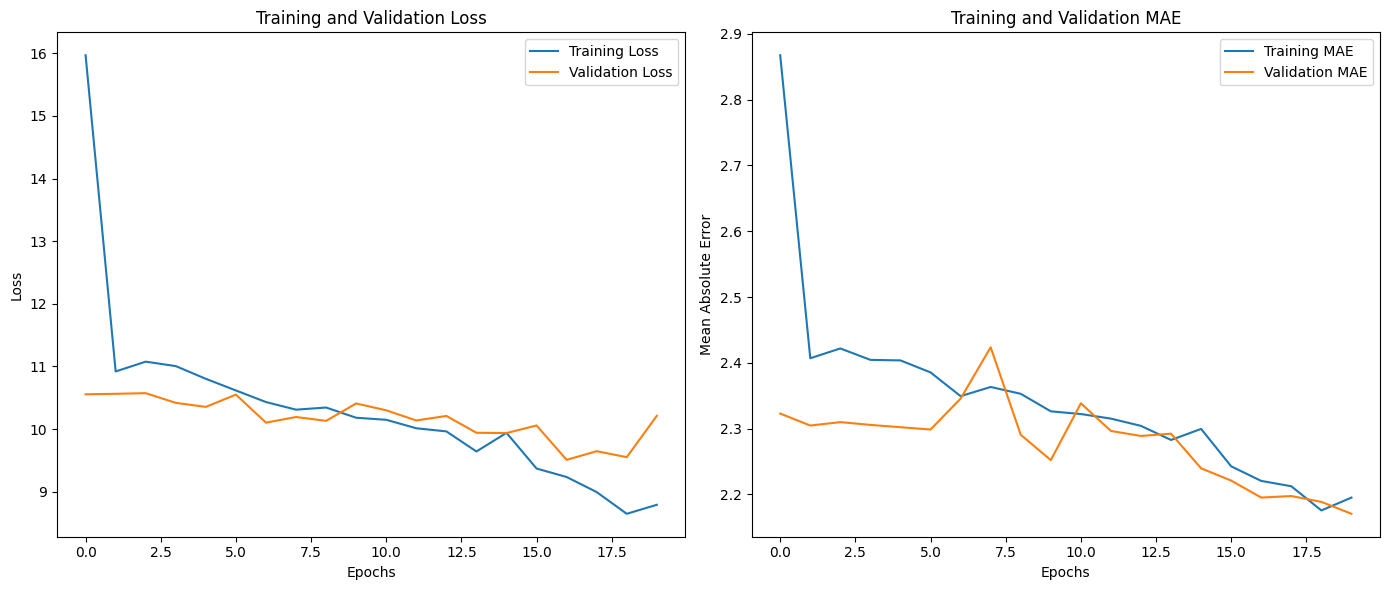

In [ ]:
# Assuming 'history' is the output from model.fit()
def plot_training_history(history):
    # Plot training and validation loss
    plt.figure(figsize=(14, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # MAE plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


In [ ]:
# Save the model to a file
model.save('lstm_crypto_model.h5')

In [ ]:
lst = ['matplotlib','tensorflow','sklearn','pandas','numpy','datetime','typing','requests']

In [ ]:
import re

def filter_requirements(requirements_file, library_names):
    """
    Filters a requirements.txt file, keeping only lines containing the specified library names.

    Args:
        requirements_file (str): Path to the requirements.txt file.
        library_names (list): List of library names to keep.

    Returns:
        None
    """

    with open(requirements_file, 'r') as f:
        lines = f.readlines()

    filtered_lines = []
    for line in lines:
        for library_name in library_names:
            if re.search(rf"\b{library_name}\b", line):
                filtered_lines.append(line)
                break

    with open(requirements_file, 'w') as f:
        f.writelines(filtered_lines)

# Example usage:
requirements_file = "requirements.txt"
library_names = lst

filter_requirements(requirements_file, library_names)